First, we want to get all zip codes within 50 miles of 61201 (found using https://www.freemaptools.com/find-zip-codes-inside-radius.htm )

Note that it would be possible to use Python to go out and retrieve this data from the web, but let's hold off on that for now.

In [1]:
LOCAL_ZIP_CODES = "61201,61299,61204,52801,52802,52805,52808,52809,61266,61265,52803,61264,52804,52807,61232,52806,52728,61240,61282,52722,61239,61244,61256,61284,52767,52726,61273,61236,61276,52759,61281,61241,61278,61279,52748,52773,52753,61263,61275,52769,61237,61274,61262,61468,52756,52746,52768,61486,52745,61233,61259,61257,61465,52758,61231,52747,61413,61254,61260,61242,52765,52778,61238,52730,52729,61490,52761,61466,52757,52742,61230,52751,61472,61272,52721,52760,61250,52774,61235,61419,52777,52749,61412,61442,61476,52720,61251,61453,52734,61435,61439,52771,52733,52736,52750,61467,61234,61488,61277,52037,61434,61414,61258,52732,52255,52752,52731,61443,61252,52254,52754,52646,52727,52653,52766,52772,52216,52776,61402,61261,61401,61344,61430,61462,61469,61270,52358,61449,52337,61423,52323,61485,61448,52069,52738,52701,52739,61283,61345,52637,61447,61428,61346,52060,61361,61285,52737,61483,52074,61418,52640,52755,61436,52207,52064,61489,52070,52306,61243,52362,61338,61410,61071,61037,52030,61314,52650,52309,52320,61437,52075,61417,61491,61451,61081,61074,52660"

zipCodes = LOCAL_ZIP_CODES.split(',')

In [2]:
import pandas as pd
# note: the money was stored with commas, like 49,000 to mean $49000, 
# so we need to tell pandas to treat numbers with commas as numbers, not text,
# using the thousands=',' keyword parameter
# and we want it to always treat the zip code column as a string
femaDat = pd.read_csv('fema_dataset.csv', thousands=',',dtype={'NPRZip5':str})

The next code involves two steps:
1. creating a boolean mask array that's True for all the zip codes we care about:
`femaDat['NPRZip5'].isin(zipCodes)` (see textbook page 163), and

2. Using that mask array to index into our original array, to get a new dataframe that contains only those records where the mask was True. (see Pages 99-101 in the textbook about boolean indexing.  `femaDat[MASK_ARRAY]`


In [3]:
isLocalMask = femaDat['NPRZip5'].isin(zipCodes)
localFemaDat = femaDat[isLocalMask]

print("Found", len(localFemaDat), "records.")

Found 570 records.


In [4]:
# save the local subset back to a CSV file so you can
# double-check your python analysis w/ excel if you like

localFemaDat.to_csv("fema_dataset_local_50_mile_filter.csv")

In [5]:
# Note: if we ask to see some of the data, Jupyter shows us
# pandas dataframe objects as nicely formatted tables!
localFemaDat[['ID','FY','City','NPRZip5','NPRPricePaid']][0:10]
# Notice how most of the rows are missing the "NPRPRicePaid" 
#  attribute, so it shows up as NaN.

,ID,FY,City,NPRZip5,NPRPricePaid
4222,1925,1993,BUFFALO,52728,NaN
4232,1935,1993,BUFFALO,52728,NaN
4251,1954,1993,WAPELLO,52653,NaN
4257,1960,1993,COLUMBUS JUNCTION,52738,NaN
4260,1963,1993,COLUMBUS JUNCTION,52738,NaN
4291,1994,1993,COLUMBUS JUNCTION,52738,NaN
4295,1998,1993,DAVENPORT,52801,NaN
4302,2005,1993,DAVENPORT,52801,NaN
4304,2007,1993,COLUMBUS JUNCTION,52738,NaN
4320,2023,1993,COLUMBUS JUNCTION,52738,NaN


# Your Assignment
Now, let's see what you can do!  Start reading Chapter 5 in your textbook to learn the basics of pandas dataframes.

Your coding challenges are:


In [6]:
localFemaDat.mean()

ID              1.059853e+04
FY              1.996800e+03
NPRZip5                  inf
NPRPricePaid    5.980032e+04
NPRLatitude     4.132871e+01
NPRLongitude   -9.090701e+01
NPRElevation    5.744097e+02
dtype: float64

In [7]:
#1. Find out how many local records we have price data for, 
#   using the dataframe's .count() method on that column
localFemaDat['NPRPricePaid'].count()

100

In [8]:
#2. Find out the overall average price paid for local buyouts 
#   (for the records that there is price data)
localFemaDat['NPRPricePaid'].dropna().mean()

59800.32

In [9]:
#3. use the groupy() and mean() methods together to make a table showing the 
# average price paid for buyouts in each city in the local region
# (NOTE: groupy isn't in Chapter 5... it first appears in Chapter 10 I think, 
#  or you can turn to Google...)
localFemaDat.replace('C0NESVILLE', 'CONESVILLE').groupby('City').mean()

,ID,FY,NPRPricePaid,NPRLatitude,NPRLongitude,NPRElevation
City,,,,,,
ATALISSA,36615.210526,2010.368421,100261.071429,41.667331,-91.167357,681.605789
BETTENDORF,36450.166667,2011.333333,NaN,41.548804,-90.503318,602.975833
BUFFALO,1930.000000,1993.000000,NaN,41.455890,-90.725000,560.080000
CHARLOTTE,25143.000000,2002.000000,22957.000000,41.960327,-90.472047,692.760000
CLEVELAND,17550.812500,1997.937500,NaN,41.506496,-90.315936,574.701250
COLUMBUS JUNCTION,10971.500000,1997.166667,40037.800000,41.285992,-91.348052,598.861111
CONESVILLE,34141.000000,2008.000000,NaN,41.386471,-91.311357,590.358571
DAVENPORT,22830.865385,2001.288462,50647.878049,41.513289,-90.611147,569.791346
EAST MOLINE,1068.000000,1993.000000,NaN,41.500476,-90.442801,698.070000


In [10]:
#4. find the average price paid for buyouts in our region for each year

localFemaDat.groupby('FY').mean()

,ID,NPRPricePaid,NPRLatitude,NPRLongitude,NPRElevation
FY,,,,,
1993,1767.405836,NaN,41.240836,-90.965497,557.938674
1997,15445.968750,NaN,41.528577,-90.312754,580.685625
2000,22370.411765,43748.000000,41.492695,-90.473164,572.394118
2001,22950.600000,51672.815789,41.492957,-90.646461,573.428500
2002,25044.000000,93152.333333,41.477530,-90.703938,597.627333
2008,34236.943662,63645.672727,41.411721,-91.097820,621.177042
2010,37731.000000,NaN,45.332840,-97.303340,1828.340000
2014,42705.000000,74500.000000,41.996707,-91.147330,746.255000
2015,43282.500000,NaN,41.548729,-90.515622,608.838000


In [11]:

localFemaDat.dropna().groupby('FY').mean()

,ID,NPRPricePaid,NPRLatitude,NPRLongitude,NPRElevation
FY,,,,,
2001,22962.970588,47093.205882,41.500339,-90.628981,565.563235
2002,25076.666667,93152.333333,41.612516,-90.652146,608.166667
2008,34197.176471,68421.568627,41.387457,-91.089179,626.949804
2014,42705.000000,74500.000000,41.996707,-91.147330,746.255000


Then try to answer our client's questions, if they are answerable from the data, and also do whatever other analyses that you can with the data that sound interesting.

# Client Questions

# Q1:
How many properties in the Quad Cities area (or northwestern Illinois and eastern Iowa) did FEMA buyout since the severe floods in 2008? How many properties were eligible for the program?

In [12]:
localFemaDatFrom08 = localFemaDat[localFemaDat['FY'] >= 2008]
localFemaDatFrom08

,ID,FY,Area,Add1,City,STPostal,NPRZip5,NPRDisasterNo,DisasterDescription,County,...,Action,ProjCounties,Grantee,Subgrantee,Type,NPRDateClosed,NPRPricePaid,NPRLatitude,NPRLongitude,NPRElevation
5646,33514,2008,HMGP,106 W ROCHESTER AVE,ATALISSA,IA,52720,1763,"SEVERE STORMS, TORNADOES, AND FLOODING",Muscatine,...,Acquisition,CEDAR,Statewide,Cedar (County),200.1: Acquisition of Private Real Property (S...,5/31/2013,48862.0,41.670400,-91.166740,658.85
5662,33534,2008,HMGP,1100 CONCORD STREET,COLUMBUS JUNCTION,IA,52738,1763,"SEVERE STORMS, TORNADOES, AND FLOODING",Louisa,...,Acquisition,LOUISA,Statewide,Louisa (County),200.1: Acquisition of Private Real Property (S...,6/17/2013,44418.0,41.283870,-91.343360,582.29
5671,33546,2008,HMGP,110 W ROCHESTER AVE,ATALISSA,IA,52720,1763,"SEVERE STORMS, TORNADOES, AND FLOODING",Muscatine,...,Acquisition,CEDAR,Statewide,Cedar (County),200.1: Acquisition of Private Real Property (S...,5/31/2013,54208.0,41.670330,-91.166970,661.14
5682,33560,2008,HMGP,1140 CEMETERY RD,TIPTON,IA,52772,1763,"SEVERE STORMS, TORNADOES, AND FLOODING",Cedar,...,Acquisition,CEDAR,Statewide,Cedar (County),200.1: Acquisition of Private Real Property (S...,5/31/2013,81301.0,41.666340,-91.141200,682.02
5704,33596,2008,HMGP,11762 HIGHWAY 99,WAPELLO,IA,52653,1763,"SEVERE STORMS, TORNADOES, AND FLOODING",Louisa,...,Acquisition,LOUISA,Statewide,Louisa (County),200.1: Acquisition of Private Real Property (S...,6/26/2013,100554.0,41.145165,-91.075998,657.59
5710,33607,2008,HMGP,119 E WALNUT STREET,COLUMBUS JUNCTION,IA,52738,1763,"SEVERE STORMS, TORNADOES, AND FLOODING",Louisa,...,Acquisition,LOUISA,Statewide,Louisa (County),200.1: Acquisition of Private Real Property (S...,6/17/2013,54747.0,41.280098,-91.361220,614.96
5742,33660,2008,HMGP,125 3RD STREET,COLUMBUS JUNCTION,IA,52738,1763,"SEVERE STORMS, TORNADOES, AND FLOODING",Louisa,...,Acquisition,LOUISA,Statewide,Louisa (County),200.1: Acquisition of Private Real Property (S...,6/17/2013,35640.0,41.281578,-91.362816,582.08
5743,33661,2008,HMGP,12569 COUNTY ROAD G62,WAPELLO,IA,52653,1763,"SEVERE STORMS, TORNADOES, AND FLOODING",Louisa,...,Acquisition,LOUISA,Statewide,Louisa (County),200.1: Acquisition of Private Real Property (S...,6/17/2013,98890.0,41.185175,-91.166654,558.69
5744,33662,2008,HMGP,12624 HIGHWAY 99,WAPELLO,IA,52653,1763,"SEVERE STORMS, TORNADOES, AND FLOODING",Louisa,...,Acquisition,LOUISA,Statewide,Louisa (County),200.1: Acquisition of Private Real Property (S...,6/26/2013,96808.0,41.145709,-91.077873,660.06
5747,33667,2008,HMGP,127 W ROCHESTER AVE,ATALISSA,IA,52720,1763,"SEVERE STORMS, TORNADOES, AND FLOODING",Muscatine,...,Acquisition,CEDAR,Statewide,Cedar (County),200.1: Acquisition of Private Real Property (S...,5/31/2013,83710.0,41.670433,-91.166530,657.57


In [13]:
localFemaDatFrom08.describe()

,ID,FY,NPRPricePaid,NPRLatitude,NPRLongitude,NPRElevation
count,89.000000,89.000000,57.000000,89.000000,89.000000,89.000000
mean,36029.191011,2009.449438,64026.526316,41.498835,-91.107151,638.836854
std,3655.590845,2.984853,45920.176178,0.492816,0.714590,142.833720
min,33514.000000,2008.000000,0.000000,41.011420,-97.303340,539.260000
25%,34008.000000,2008.000000,30899.000000,41.145907,-91.170700,565.360000
50%,34296.000000,2008.000000,48862.000000,41.547195,-91.144135,609.100000
75%,34856.000000,2008.000000,98890.000000,41.669262,-91.066994,661.700000
max,43971.000000,2017.000000,250635.000000,45.332840,-90.514410,1828.340000


# Answer: 
89 properties were bought in 50 miles of 61201. Only 57 of them have the price tag though.

# Q2:
How does that number compare to flood buyouts after the big 1993 Mississippi Flood?

In [14]:
isAf93 = 1993 <= localFemaDat['FY']
isBe08 = localFemaDat['FY'] <= 2008
# https://stackoverflow.com/questions/20027131/combining-3-boolean-masks-in-python
isBetween = [all(tup) for tup in zip(isAf93, isBe08)]
localFemaDatFrom93To08 = localFemaDat[isBetween]
localFemaDatFrom93To08

,ID,FY,Area,Add1,City,STPostal,NPRZip5,NPRDisasterNo,DisasterDescription,County,...,Action,ProjCounties,Grantee,Subgrantee,Type,NPRDateClosed,NPRPricePaid,NPRLatitude,NPRLongitude,NPRElevation
4222,1925,1993,HMGP,104 FRANKLIN STREET,BUFFALO,IA,52728,0996,SEVERE STORMS & FLOODING,Scott,...,Acquisition,SCOTT,NaN,BUFFALO,200.1: Acquisition of Private Real Property (S...,12/9/1996,NaN,41.455480,-90.726700,558.65
4232,1935,1993,HMGP,106 FRANKLIN,BUFFALO,IA,52728,0996,SEVERE STORMS & FLOODING,Scott,...,Acquisition,SCOTT,NaN,BUFFALO,200.1: Acquisition of Private Real Property (S...,12/9/1996,NaN,41.456300,-90.723300,561.51
4251,1954,1993,HMGP,11304 HWY 99,WAPELLO,IA,52653,0996,SEVERE STORMS & FLOODING,Louisa,...,Acquisition,LOUISA,NaN,LOUISA,200.1: Acquisition of Private Real Property (S...,12/2/1998,NaN,41.166057,-91.137801,554.06
4257,1960,1993,HMGP,114 WALNUT,COLUMBUS JUNCTION,IA,52738,0996,SEVERE STORMS & FLOODING,Louisa,...,Acquisition,LOUISA,NaN,LOUISA,200.1: Acquisition of Private Real Property (S...,12/2/1998,NaN,41.280337,-91.361091,610.95
4260,1963,1993,HMGP,116 3RD ST,COLUMBUS JUNCTION,IA,52738,0996,SEVERE STORMS & FLOODING,Louisa,...,Acquisition,LOUISA,NaN,LOUISA,200.1: Acquisition of Private Real Property (S...,12/2/1998,NaN,41.281620,-91.362854,582.08
4291,1994,1993,HMGP,124 5TH ST,COLUMBUS JUNCTION,IA,52738,0996,SEVERE STORMS & FLOODING,Louisa,...,Acquisition,LOUISA,NaN,LOUISA,200.1: Acquisition of Private Real Property (S...,12/2/1998,NaN,41.280617,-91.365260,586.21
4295,1998,1993,HMGP,127 32ND ST,DAVENPORT,IA,52801,0996,SEVERE STORMS & FLOODING,Scott,...,Acquisition,SCOTT,NaN,DAVENPORT,200.1: Acquisition of Private Real Property (S...,11/25/1996,NaN,41.552449,-90.572772,628.80
4302,2005,1993,HMGP,128 32ND ST,DAVENPORT,IA,52801,0996,SEVERE STORMS & FLOODING,Scott,...,Acquisition,SCOTT,NaN,DAVENPORT,200.1: Acquisition of Private Real Property (S...,11/25/1996,NaN,41.552599,-90.572601,628.60
4304,2007,1993,HMGP,128 3RD ST,COLUMBUS JUNCTION,IA,52738,0996,SEVERE STORMS & FLOODING,Louisa,...,Acquisition,LOUISA,NaN,LOUISA,200.1: Acquisition of Private Real Property (S...,12/2/1998,NaN,41.281414,-91.362860,582.28
4320,2023,1993,HMGP,133 5TH ST,COLUMBUS JUNCTION,IA,52738,0996,SEVERE STORMS & FLOODING,Louisa,...,Acquisition,LOUISA,NaN,LOUISA,200.1: Acquisition of Private Real Property (S...,12/2/1998,NaN,41.281250,-91.365200,593.96


In [15]:
localFemaDatFrom93To08.describe()

,ID,FY,NPRPricePaid,NPRLatitude,NPRLongitude,NPRElevation
count,552.000000,552.000000,98.000000,552.000000,552.000000,552.000000
mean,9538.744565,1996.201087,59500.326531,41.311955,-90.899288,570.037391
std,12127.916895,5.293334,41999.889101,0.242586,0.286107,48.408161
min,542.000000,1993.000000,0.000000,38.105099,-91.945056,531.090000
25%,1259.250000,1993.000000,31671.500000,41.101486,-91.105185,544.170000
50%,2402.500000,1993.000000,43621.500000,41.330452,-90.942367,550.120000
75%,22229.250000,2000.000000,86291.500000,41.463604,-90.710968,572.107500
max,35597.000000,2008.000000,250635.000000,41.999640,-90.068780,808.120000


# Answer:
There are 522 buyouts from 1993 to 2008 for cities in the range of 50 miles from 61201.

# Alternative Answer:

In [16]:
localFemaDatFrom93 = localFemaDat[isAf93]
localFemaDatFrom93.describe()

,ID,FY,NPRPricePaid,NPRLatitude,NPRLongitude,NPRElevation
count,570.000000,570.000000,100.000000,570.000000,570.000000,570.000000
mean,10598.529825,1996.800000,59800.320000,41.328707,-90.907015,574.409737
std,13303.959324,6.183372,41634.360469,0.298127,0.393345,72.497264
min,542.000000,1993.000000,0.000000,38.105099,-97.303340,531.090000
25%,1310.750000,1993.000000,32022.500000,41.101562,-91.105397,544.227500
50%,2520.000000,1993.000000,43828.500000,41.330481,-90.942367,550.120000
75%,22821.250000,2001.000000,85206.500000,41.479461,-90.625373,574.965000
max,43971.000000,2017.000000,250635.000000,45.332840,-90.068780,1828.340000


In [17]:
print('Buyouts from 2008:', localFemaDatFrom08['ID'].count())
print('Buyouts from 1993 to 2008:', localFemaDatFrom93['ID'].count())
print('% Buyouts from 08 / buyouts from 93: ', localFemaDatFrom08['ID'].count() * 100.0 / localFemaDatFrom93['ID'].count(), '%')

Buyouts from 2008: 89
Buyouts from 1993 to 2008: 570
% Buyouts from 08 / buyouts from 93:  15.614035087719298 %


Apparently 15.61% buyouts after the 1993 Mississippi Floods are after 2008.

# Q3:
Is there a way to find out what was on the properties (homes, businesses, farm fields) and examinethe figures with that in mind?

In [18]:
localFemaDat[['ID','FY','City','NPRPricePaid','Owner']][0:40]

,ID,FY,City,NPRPricePaid,Owner
4222,1925,1993,BUFFALO,NaN,NaN
4232,1935,1993,BUFFALO,NaN,NaN
4251,1954,1993,WAPELLO,NaN,NaN
4257,1960,1993,COLUMBUS JUNCTION,NaN,NaN
4260,1963,1993,COLUMBUS JUNCTION,NaN,NaN
4291,1994,1993,COLUMBUS JUNCTION,NaN,NaN
4295,1998,1993,DAVENPORT,NaN,NaN
4302,2005,1993,DAVENPORT,NaN,NaN
4304,2007,1993,COLUMBUS JUNCTION,NaN,NaN
4320,2023,1993,COLUMBUS JUNCTION,NaN,NaN


In [19]:
hasStrucType = ~localFemaDat['StrucType'].isna()
localFemaDatWStruc = localFemaDat[hasStrucType]
localFemaDatWStruc.describe()

,ID,FY,NPRPricePaid,NPRLatitude,NPRLongitude,NPRElevation
count,157.000000,157.000000,100.000000,157.000000,157.000000,157.000000
mean,30505.509554,2005.802548,59800.320000,41.496211,-90.891268,613.010127
std,6938.742290,4.766926,41634.360469,0.372818,0.598331,116.687779
min,22224.000000,2000.000000,0.000000,41.011420,-97.303340,539.260000
25%,22967.000000,2001.000000,32022.500000,41.401149,-91.148010,556.570000
50%,33682.000000,2008.000000,43828.500000,41.503998,-90.746261,575.800000
75%,34450.000000,2008.000000,85206.500000,41.549270,-90.621025,655.200000
max,43971.000000,2017.000000,250635.000000,45.332840,-90.313750,1828.340000


In [20]:
localFemaDatWStruc.groupby('StrucType').count()

,ID,FY,Area,Add1,City,STPostal,NPRZip5,NPRDisasterNo,DisasterDescription,County,...,Action,ProjCounties,Grantee,Subgrantee,Type,NPRDateClosed,NPRPricePaid,NPRLatitude,NPRLongitude,NPRElevation
StrucType,,,,,,,,,,,,,,,,,,,,,
Non-residential - Public,3,3,3,3,3,3,3,3,0,3,...,3,3,3,3,3,0,0,3,3,3
Single Family,148,148,148,148,148,148,148,148,129,148,...,148,148,129,148,148,115,96,148,148,148
Vacant Land,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,5,4,6,6,6


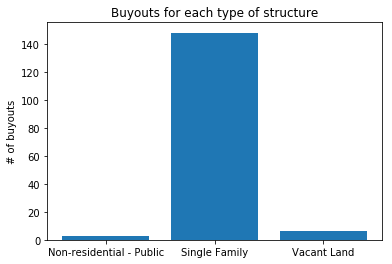

In [85]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

xAx = localFemaDatWStruc.groupby('StrucType').count().index.tolist()
plt.bar(range(len(xAx)), localFemaDatWStruc.groupby('StrucType').count()['ID'].tolist(), align='center')

plt.xticks(range(len(xAx)), xAx)
plt.ylabel('# of buyouts')
plt.title('Buyouts for each type of structure')

plt.show()

This graph is what I got after analyzing the rows with 'StrucType' data available. Keep in mind that there are a lot of rows in this data set lack a 'StrucType' value. From this graph though, most of the buyouts are from single families.

# Q4:
How much money did recipients receive by taking advantage of a buyout?

I think we answered that question above by the mean of buyouts in the 50 miles range of 61201:

In [35]:
localFemaDat['NPRPricePaid'].dropna().mean()

59800.32

We can have some more insights by finding the mean money by cities

In [34]:
localFemaDat[['City','NPRPricePaid']].dropna().groupby('City').mean()

,NPRPricePaid
City,
ATALISSA,100261.071429
CHARLOTTE,22957.000000
COLUMBUS JUNCTION,40037.800000
DAVENPORT,50647.878049
ILLINOIS CITY,134000.000000
MEDIAPOLIS,31295.000000
MOSCOW,33253.000000
OAKVILLE,77968.000000
OLIN,45031.714286


Atalissa, Illinois City, and Taylor Ridge each has a mean of over $100,000 NPRPricePaid while the other cities are pretty far behind. Very interesting.

# Q5:
What can the information in the data tell us about the property owners?

There are not much that we can talk about the property owners because of the lack of data. Maybe with a better and more comprehensive data set we can explore who the property owners are and in what ways they are significant.

In [27]:
# Jupyter usage note, you can add/remove these code cells 
# using the Insert/Edit menus above.
femaDat.keys()

Index(['ID', 'FY', 'Area', 'Add1', 'City', 'STPostal', 'NPRZip5',
       'NPRDisasterNo', 'DisasterDescription', 'County', 'Owner', 'ResType',
       'DamageCat', 'DateClosed', 'StrucType', 'PartOfProj', 'ProjTitle',
       'ProjID', 'Status', 'Action', 'ProjCounties', 'Grantee', 'Subgrantee',
       'Type', 'NPRDateClosed', 'NPRPricePaid', 'NPRLatitude', 'NPRLongitude',
       'NPRElevation'],
      dtype='object')

**Finally, for any advanced students in the class who are hungering for an extra challenge...**

Find another public dataset on the web that contains socioeconomic data by zip code (possibly from the IRS?).  Load that up into a dataframe too, merge() it with the total FEMA dataset that's been aggregated to find the total price payouts by zip code, and create a scatter plot that tries to identify if there's a trend that the most money got paid out to the wealthiest zip codes.